In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

df = pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\2017_lloguer_preu_trim.csv")

In [246]:
df.shape

(584, 8)

In [247]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,584.0,584.000000,584.000000,584.000000,546.000000
mean,2017.0,2.500000,6.246575,37.000000,421.009231
std,0.0,1.118992,2.790726,21.089371,446.178147
min,2017.0,1.000000,1.000000,1.000000,4.450000
25%,2017.0,1.750000,4.000000,19.000000,12.645000
50%,2017.0,2.500000,7.000000,37.000000,161.565000
75%,2017.0,3.250000,8.000000,55.000000,770.347500
max,2017.0,4.000000,10.000000,73.000000,1882.420000


In [248]:
# def plot_variables(df):
#     # Obteniendo listas de columnas por tipo de datos
#     numeric_cols = df.select_dtypes(include=['int', 'float']).columns
#     categorical_cols = df.select_dtypes(include=['object']).columns
#     boolean_cols = df.select_dtypes(include=['bool']).columns

#     # Graficar variables numéricas
#     for col in numeric_cols:
#         plt.figure(figsize=(8, 6))
#         plt.hist(df[col], bins=20)
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Histograma de {col}')
#         plt.show()

#     # Graficar variables categóricas
#     for col in categorical_cols:
#         plt.figure(figsize=(8, 6))
#         df[col].value_counts().plot(kind='bar')
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Gráfico de barras de {col}')
#         plt.show()

#     # Graficar variables booleanas
#     for col in boolean_cols:
#         plt.figure(figsize=(8, 6))
#         df[col].value_counts().plot(kind='bar')
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Gráfico de barras de {col}')
#         plt.show()


# plot_variables(df)

In [249]:
#  la media de la columna "Preu"
mean_lloguer = df['Preu'].mean()

# Rellena los valores faltantes con la media
df['Preu'].fillna(mean_lloguer, inplace=True)

In [250]:
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [251]:
df.duplicated().sum()

0

In [252]:
# no me gusta que los nombre de las columnas esten en mayusculas los cambiare a todo minusculas y tambien cambiare el nombre del precio
df.columns = df.columns.str.lower()
df.rename(columns={'preu': 'lloguer mitjà mensual'}, inplace=True)

In [253]:
valores_unicos = df['lloguer mitjà mensual'].unique()
# Calcular la cantidad de valores únicos
cantidad_valores_unicos = len(valores_unicos)
print(cantidad_valores_unicos)

505


In [254]:
print(df.columns)

Index(['any', 'trimestre', 'codi_districte', 'nom_districte', 'codi_barri',
       'nom_barri', 'lloguer_mitja', 'lloguer mitjà mensual'],
      dtype='object')


In [255]:
# borrare las columnas que no necesito solo dejare la de precio y las dos columnas por las cuales haremos el merge
df = df.drop(columns=["any", "nom_districte","nom_barri","lloguer_mitja",])


In [256]:
df.head(10)

,trimestre,codi_districte,codi_barri,lloguer mitjà mensual
0,1,1,1,734.99
1,1,1,2,905.26
2,1,1,3,722.78
3,1,1,4,895.28
4,1,2,5,871.08
5,1,2,6,847.04
6,1,2,7,1151.09
7,1,2,8,1001.49
8,1,2,9,909.08
9,1,2,10,876.97


Tendre que normalizar la variable target ya que esta afecta por precios atipicos les pondrea todos los precios que son menos de lo normal le pondre la media por codigo de barrio y despues hare una verificacion un test del sesgo  si esta afectada la normalizare

In [257]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['lloguer mitjà mensual'].value_counts())

lloguer mitjà mensual
421.009231     38
10.400000       3
12.280000       3
11.690000       3
13.970000       3
13.340000       3
8.960000        2
9.520000        2
13.440000       2
12.590000       2
13.950000       2
10.860000       2
12.790000       2
13.830000       2
11.090000       2
13.150000       2
13.520000       2
12.660000       2
13.480000       2
13.540000       2
10.030000       2
12.480000       2
804.260000      2
12.970000       2
13.380000       2
15.010000       2
13.990000       2
10.930000       2
11.610000       2
11.680000       2
10.530000       2
8.790000        2
11.810000       2
14.230000       2
11.960000       2
11.140000       2
14.210000       2
16.760000       2
12.890000       1
12.260000       1
13.060000       1
16.260000       1
11.230000       1
9.800000        1
12.430000       1
10.540000       1
15.790000       1
13.350000       1
13.250000       1
734.990000      1
13.690000       1
13.780000       1
10.840000       1
9.480000        1
12.600

In [258]:
# Calcular la media de precio por código de barrio
media_por_barrio = df.groupby('codi_barri')['lloguer mitjà mensual'].mean().reset_index()

# Crear un nuevo DataFrame con la media por barrio
media_por_barrio.columns = ['codi_barri', 'media_lloguer']

# Fusionar el DataFrame original con el DataFrame de la media
df = df.merge(media_por_barrio, on='codi_barri', how='left')


df['lloguer mitjà mensual'] = df['lloguer mitjà mensual'].where(df['lloguer mitjà mensual'] > 30, df['media_lloguer'])

# Eliminar la columna auxiliar 'media_lloguer' 
del df['media_lloguer']

# 'df' ahora contiene la media de precio por código de barrio y las filas con valores menores a 30 rellenadas con la media correspondiente, y todas las columnas originales se conservan.

In [259]:
df.describe()

,trimestre,codi_districte,codi_barri,lloguer mitjà mensual
count,584.000000,584.000000,584.000000,584.000000
mean,2.500000,6.246575,37.000000,612.775596
std,1.118992,2.790726,21.089371,279.832441
min,1.000000,1.000000,1.000000,221.795000
25%,1.750000,4.000000,19.000000,394.554375
50%,2.500000,7.000000,37.000000,539.565000
75%,3.250000,8.000000,55.000000,766.035000
max,4.000000,10.000000,73.000000,1882.420000


In [260]:
from scipy.stats import skew
sesgo = df['lloguer mitjà mensual'].skew()
print(sesgo)

1.3401384862337895


Claramente esta afectada tendre normalizarla

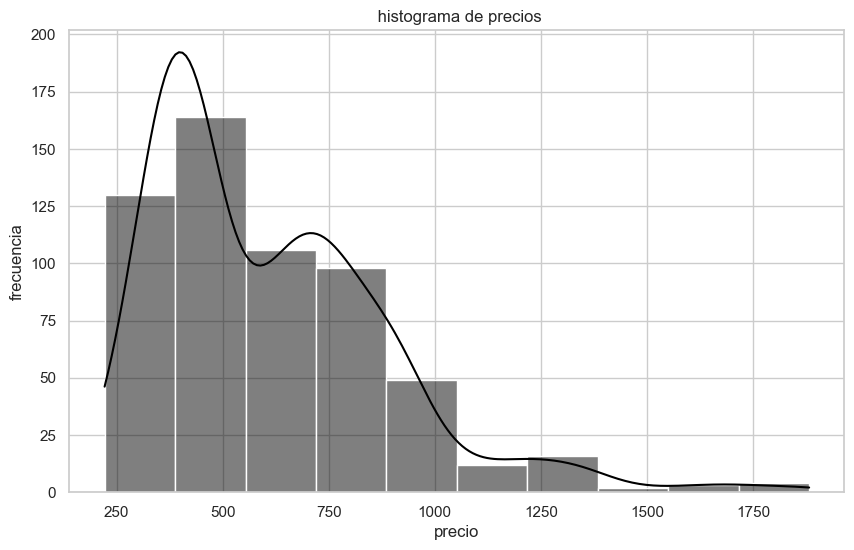

In [261]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(df['lloguer mitjà mensual'], kde=True, color="black", bins=10)

plt.xlabel('precio')
plt.ylabel('frecuencia')
plt.title(" histograma de precios")

plt.show()

In [262]:
df['precio_sqrt'] = np.sqrt(df['lloguer mitjà mensual'])
sesgo1 = df['precio_sqrt'].skew()
print(sesgo1)

0.7605331104886143


In [263]:
df['precio_log10'] = np.log10(df['lloguer mitjà mensual'])
sesgo2 = df['precio_log10'].skew()
print(sesgo2)

0.2980056763038507


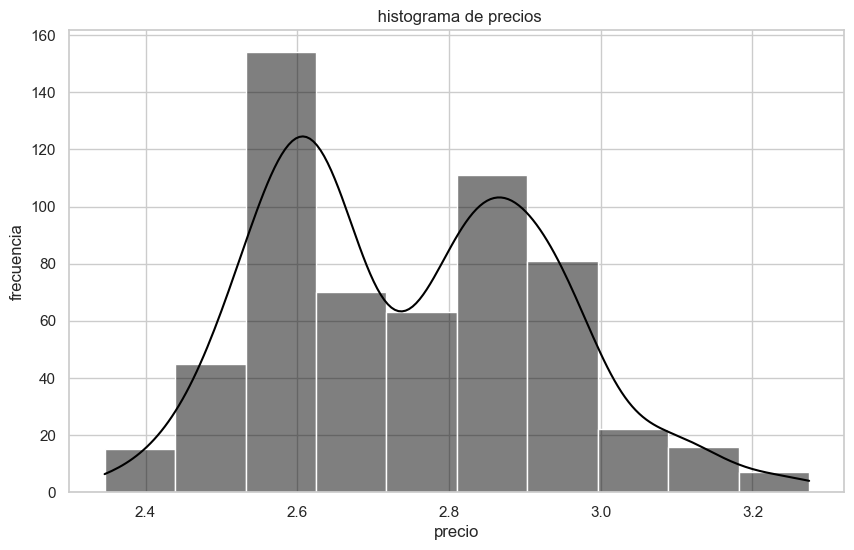

In [264]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(df['precio_log10'], kde=True, color="black", bins=10)

plt.xlabel('precio')
plt.ylabel('frecuencia')
plt.title(" histograma de precios")

plt.show()

Me  quedare con el precio normalizado las demas las borrare la mejor es NP10log

In [265]:
df = df.drop(['lloguer mitjà mensual', 'precio_sqrt'], axis=1)


In [266]:
df.to_csv(r'C:\Users\JOSUE\Downloads\hackathon\real_state_limpio.csv', index=False)